In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv('tested.csv',sep=',')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.shape

(418, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
data=data.drop(columns='Cabin',axis='1')
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Visualization

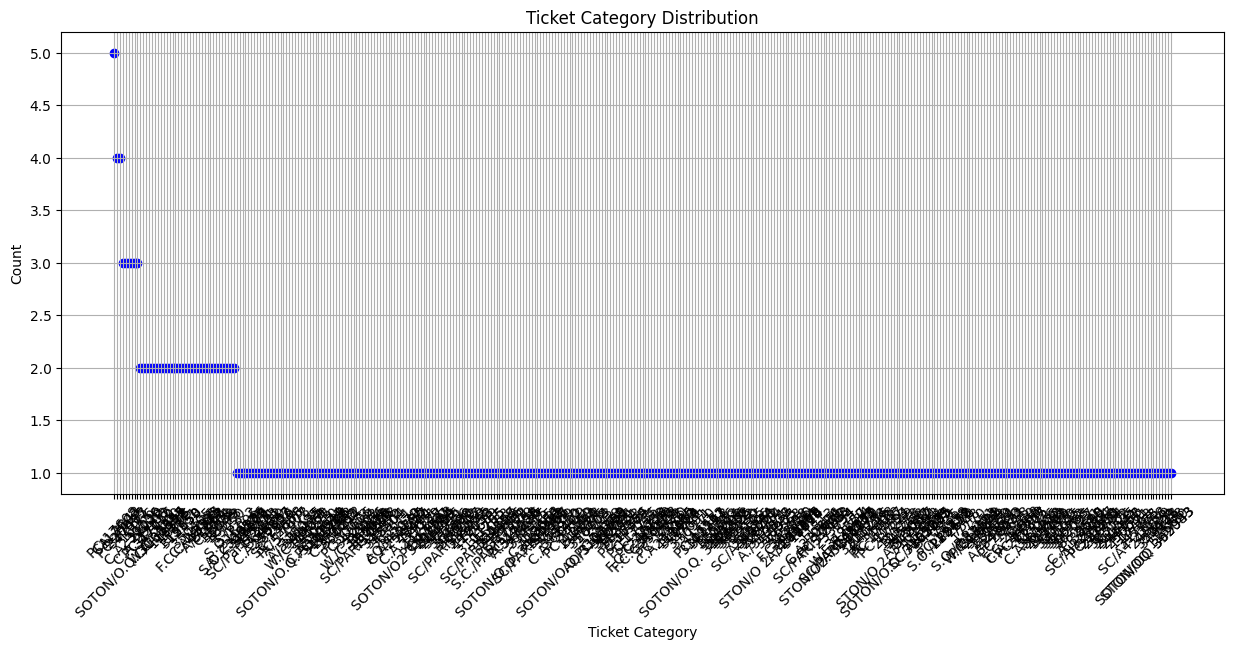

In [25]:
ticket = data['Ticket'].value_counts()
cat = ticket.index
count = ticket.values
plt.figure(figsize=(15, 6))
plt.scatter(cat, count, c='blue', marker='o')
plt.xlabel('Ticket Category')
plt.ylabel('Count')
plt.title('Ticket Category Distribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Text(0, 0.5, 'Count ')

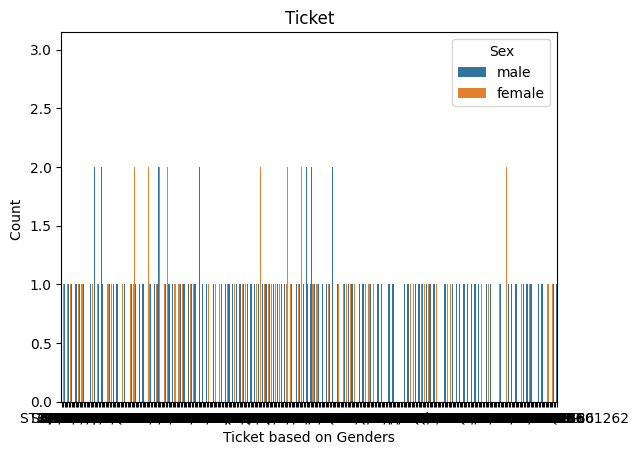

In [27]:
sns.countplot(x='Ticket',hue='Sex',data=data)
plt.title("Ticket")
plt.xlabel("Ticket based on Genders")
plt.ylabel("Count ")

In [15]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Text(0, 0.5, 'Count of the Survivers')

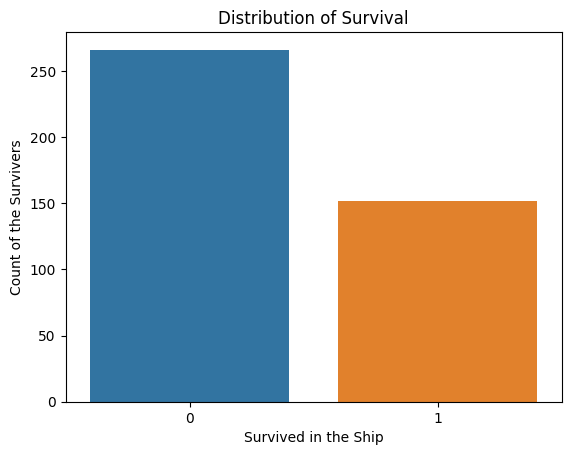

In [20]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.xlabel("Survived in the Ship")
plt.ylabel("Count of the Survivers")

In [22]:
data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

Text(0, 0.5, 'Count of the Survivers')

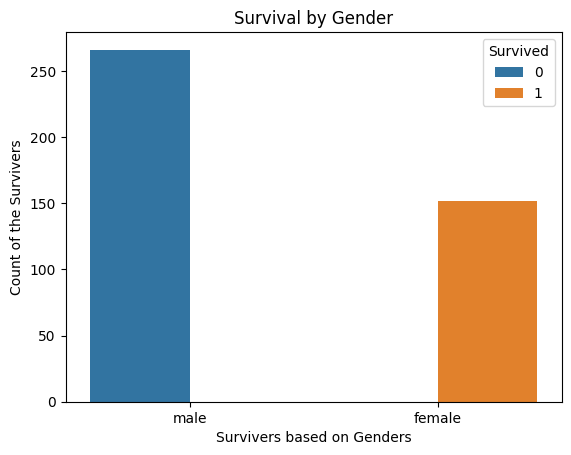

In [24]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title("Survival by Gender")
plt.xlabel("Survivers based on Genders")
plt.ylabel("Count of the Survivers")

In [30]:
data['Age'].value_counts()

30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
76.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: Age, Length: 80, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

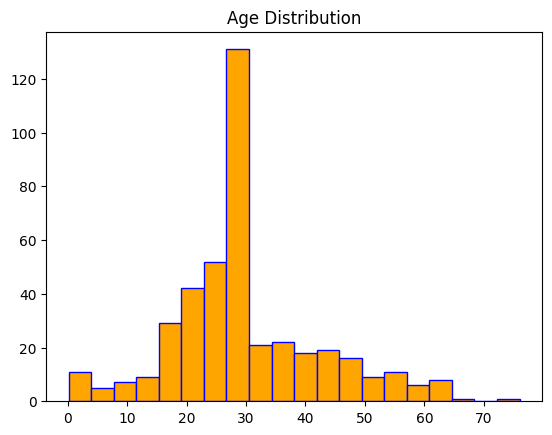

In [29]:
plt.hist(data['Age'], bins=20,edgecolor='blue', color='orange')
plt.title("Age Distribution")

Text(0, 0.5, 'Count of the Survivers')

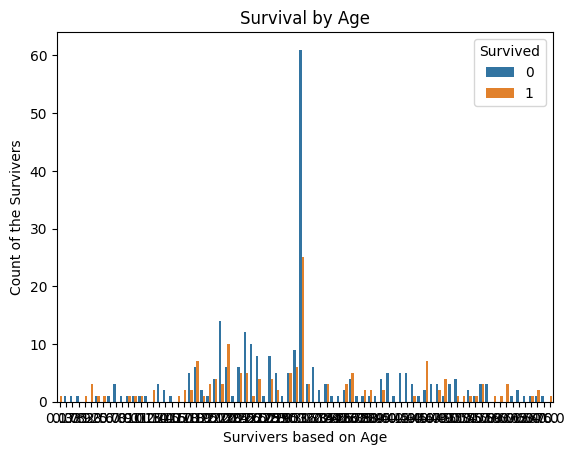

In [31]:
sns.countplot(x='Age',hue='Survived',data=data)
plt.title("Survival by Age")
plt.xlabel("Survivers based on Age")
plt.ylabel("Count of the Survivers")

<Axes: xlabel='Fare', ylabel='Density'>

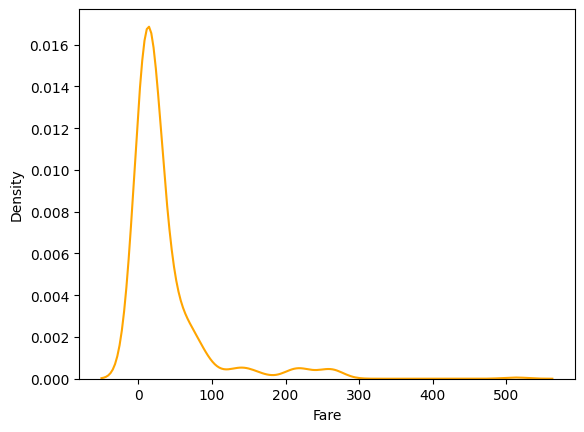

In [34]:
sns.kdeplot(data=data['Fare'], color='orange')

<ipython-input-40-c90e0eeeb1ec>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SibSp'],color='g')
<ipython-input-40-c90e0eeeb1ec>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Parch'],color='g')


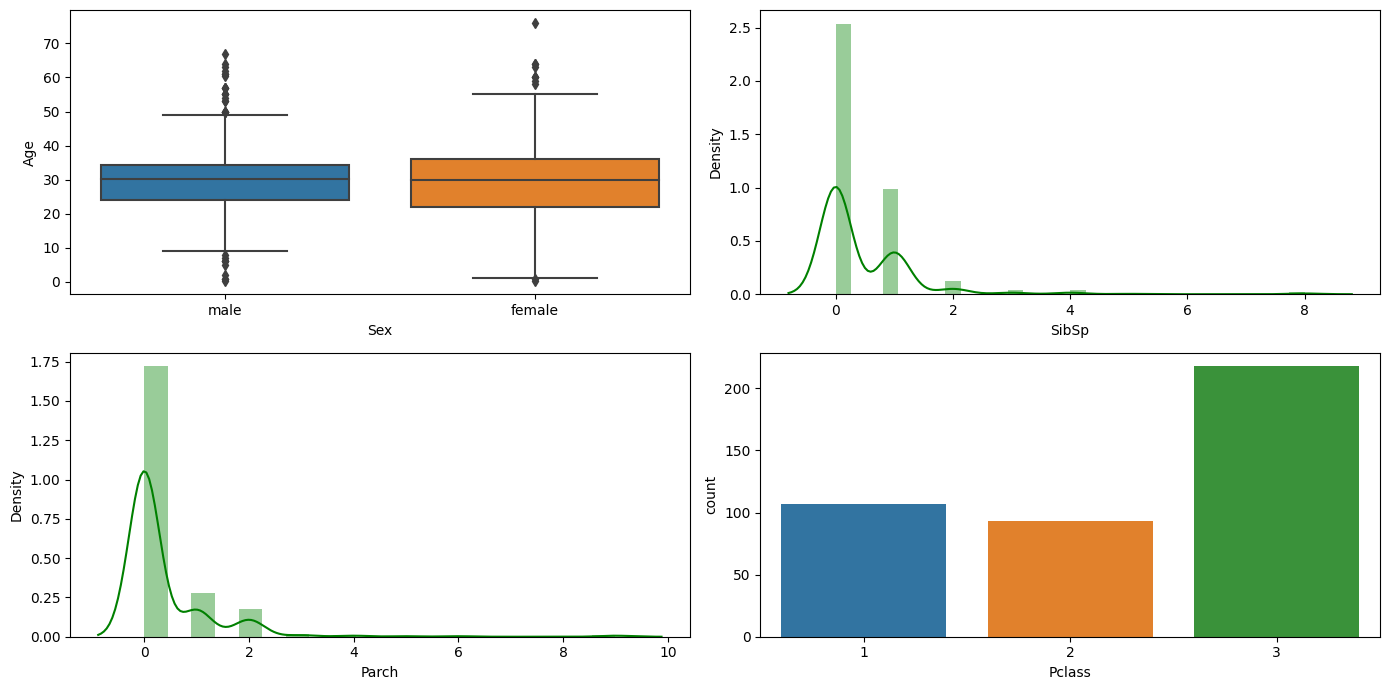

In [40]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= data)
plt.subplot(2,2,2)
sns.distplot(data['SibSp'],color='g')
plt.subplot(2,2,3)
sns.distplot(data['Parch'],color='g')
plt.subplot(2,2,4)
sns.countplot(x='Pclass', data=data)
plt.tight_layout()
plt.show()

Train and Test Data

In [84]:
x=data.drop(columns= ['Name','Ticket','Survived','Sex','Embarked'],axis=1)
y=data['Survived']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
model=LogisticRegression()

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

In [89]:
x_train_pred=model.predict(x_train)
accuracy=accuracy_score(y_train,x_train_pred)
print('Accuracy score of training data is:',accuracy)

Accuracy score of training data is: 0.6526946107784432


In [90]:
x_test_pred=model.predict(x_test)
test_accuracy=accuracy_score(y_test,x_test_pred)
print('Accuracy score of testing data is:',test_accuracy)

Accuracy score of testing data is: 0.6190476190476191
